# Financial Data Sources and APIs

At this point, I would like to introduce how we access the main financial and economics data as we are about to employ these data in financial modeling. One of the shortest way to access the data is to use `Application Program  Interface` or `API`.  Followings are some of the good reasons to use APIs:

* Downloading data directly from the websute takes time. I do not even talk about if we want to download large data set (>1 GB) into our local computer, it may turn to a torture.
* We need a subset from a large dataset. Using APIs results in easy filtering
* If we are running an analysis requiring repeated computation, then accessing it via APIs is a life-saver for us. Because, otherwise, as we can imagine, we should visit the related website everytime we need data.

##  Yahoo Finance API

Yahoo finance allows users to access the stock quotes, up-to-date news, portfolio management resources, international market data and so on. In order to access this resource, we, first, will install the `yahoo-finance` package via `pip3`:

    !pip3 install yfinance

 Once we install the `yfinance`, it is time to import the Pyhton package:

In [1]:
import yfinance as yf

In the following example, we will extract a couple of stock data. However, before applying the Python application, there are few thing to know. First of all, we need to specify the tickers' of the stocks. Ticker basically symbolizes the stock and instead of writing the full name of the stock, using ticker is more convenient. 

In addition to that, datime is required because we are trying to access a data with time dimension. Start time and end time defines the time period in which we analyze the stock price. Finally, the time interval needs to be defined as we can prefer analyzing the stock price based on different time interval such as daily, weekly, monthly, or yearly.

Let's extract daily stock price of `Apple` between 01.01.2010-04.09.2020.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

Now, we have the Apple stock price within specified period. 

In [3]:
stocks = ['^GSPC', 'AAPL', 'MSFT', 'INTC'] 
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 9, 1)
port = yf.download(stocks, start=start, end=end, interval='1d')

[*********************100%***********************]  4 of 4 completed


As you notice, we have open, `high`, `low`, `close`, `adjusted close` prices and `volume` with date index. It does not make sense to work with all these data. So, we select closing price to move forward.

In [4]:
port.head()

Adj Close                                           Close  \
                  AAPL       INTC        MSFT        ^GSPC        AAPL   
Date                                                                     
2020-12-31  131.333527  47.337845  219.139328  3756.070068  132.690002   
2021-01-04  128.087067  47.195316  214.479111  3700.649902  129.410004   
2021-01-05  129.670685  48.088490  214.686005  3726.860107  131.009995   
2021-01-06  125.305801  48.554070  209.119339  3748.139893  126.599998   
2021-01-07  129.581650  49.589764  215.070236  3803.790039  130.919998   

                                                      High             ...  \
                 INTC        MSFT        ^GSPC        AAPL       INTC  ...   
Date                                                                   ...   
2020-12-31  49.820000  222.419998  3756.070068  134.740005  50.189999  ...   
2021-01-04  49.669998  217.690002  3700.649902  133.610001  51.389999  ...   
2021-01-05  50.610001  217.899994  3726.860107  131.740005  50.830002  ...   
2021-01-06  51.099998  212.250000  3748.139893  131.050003  52.150002  ...   
2021-01-07  52.189999  218.289993  3803.790039  131.630005  52.689999  ...   

                   Low                     Open                         \
                  MSFT        ^GSPC        AAPL       INTC        MSFT   
Date                                                                     
2020-12-31  219.679993  3726.879883  134.080002  48.750000  221.699997   
2021-01-04  214.809998  3662.709961  133.520004  49.889999  222.529999   
2021-01-05  215.699997  3695.070068  128.889999  49.450001  217.259995   
2021-01-06  211.940002  3705.340088  127.720001  50.439999  212.169998   
2021-01-07  213.710007  3764.709961  128.360001  51.490002  214.039993   

                            Volume                                  
                  ^GSPC       AAPL      INTC      MSFT       ^GSPC  
Date                                                                
2020-12-31  3733.270020   99116600  28576800  20942100  3172510000  
2021-01-04  3764.610107  143301900  46102500  37130100  5006680000  
2021-01-05  3698.020020   97664900  24866600  23823000  4582620000  
2021-01-06  3712.199951  155088000  36809600  35930700  6049970000  
2021-01-07  3764.709961  109578200  32092300  27694500  5080870000  

[5 rows x 24 columns]

Now, we have closing price of Apple.

In [13]:
port_close = port['Close']

In [16]:
port_close

,AAPL,INTC,MSFT,^GSPC
Date,,,,
2020-12-31,132.690002,49.820000,222.419998,3756.070068
2021-01-04,129.410004,49.669998,217.690002,3700.649902
2021-01-05,131.009995,50.610001,217.899994,3726.860107
2021-01-06,126.599998,51.099998,212.250000,3748.139893
2021-01-07,130.919998,52.189999,218.289993,3803.790039
...,...,...,...,...
2022-08-25,170.029999,34.889999,278.850006,4199.120117
2022-08-26,163.619995,33.360001,268.089996,4057.659912
2022-08-29,161.380005,32.939999,265.230011,4030.610107


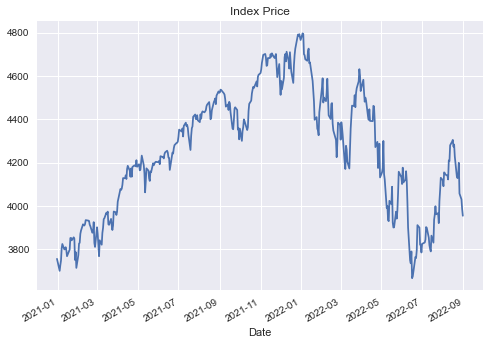

In [24]:
port_close.iloc[:,-1].plot()
plt.xlabel('Date')
plt.title('Index Price')
plt.show()

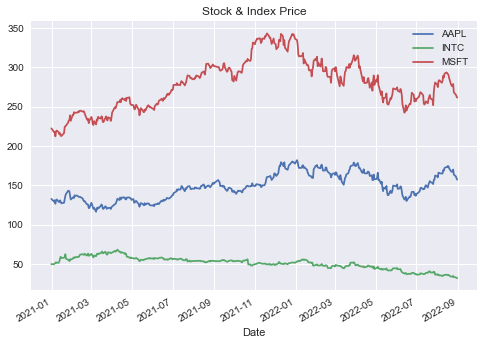

In [21]:
port_close.iloc[:,:-1].plot()
plt.xlabel('Date')
plt.title('Stock & Index Price')
plt.show()

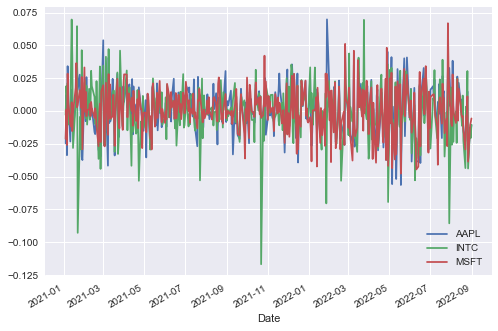

In [23]:
port_close.pct_change().iloc[:,:-1].plot();

##  Federal Reserve Economic Data (FRED)  

Using `FRED` API, we are allowed to retrieve economic data from the `FRED` website hosted by the `Economic Research Division of the Federal Reserve Bank of St. Louis`. 

In order to have your FRED API, please visit this [website](https://research.stlouisfed.org/docs/api/api_key.html) first and follow the necessary steps. Let's move on.

As always, first install the `fredapi` Python library. Then, import the `fredapi` as `Fred`.

    !pip3 install fredapi

In [25]:
from fredapi import Fred
fred = Fred(api_key='78b14ec6ba46f484b94db43694468bb1')

As we access very very large database, it is not possible to observe data simply by typing `.head()`. Instead, we need to search to locate which data we are looking for. I would like to retrive economic growth data but there is plenty versions of it. Of them, we choose the one that serves my purpose best. we use `growth` as keyword. We can try any keyword of your choice.

In [33]:
fred.search('interest')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
GDP,GDP,2022-09-14,2022-09-14,Gross Domestic Product,1947-01-01,2022-04-01,Quarterly,Q,Billions of Dollars,Bil. of $,Seasonally Adjusted Annual Rate,SAAR,2022-08-25 07:53:02-05:00,93,BEA Account Code: A191RC Gross domestic produ...
GDPC1,GDPC1,2022-09-14,2022-09-14,Real Gross Domestic Product,1947-01-01,2022-04-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2022-08-25 07:53:02-05:00,91,BEA Account Code: A191RX Real gross domestic ...
GDPA,GDPA,2022-09-14,2022-09-14,Gross Domestic Product,1929-01-01,2021-01-01,Annual,A,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2022-03-30 07:55:02-05:00,65,BEA Account Code: A191RC
A191RL1Q225SBEA,A191RL1Q225SBEA,2022-09-14,2022-09-14,Real Gross Domestic Product,1947-04-01,2022-04-01,Quarterly,Q,Percent Change from Preceding Period,% Chg. from Preceding Period,Seasonally Adjusted Annual Rate,SAAR,2022-08-25 07:53:12-05:00,75,BEA Account Code: A191RL Gross domestic produ...
A191RP1Q027SBEA,A191RP1Q027SBEA,2022-09-14,2022-09-14,Gross Domestic Product,1947-04-01,2022-04-01,Quarterly,Q,Percent Change from Preceding Period,% Chg. from Preceding Period,Seasonally Adjusted Annual Rate,SAAR,2022-08-25 07:53:16-05:00,56,BEA Account Code: A191RP For more information...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPU1371,WPU1371,2022-09-14,2022-09-14,Producer Price Index by Commodity: Nonmetallic...,1971-01-01,2022-08-01,Monthly,M,Index 1982=100,Index 1982=100,Not Seasonally Adjusted,NSA,2022-09-14 07:53:49-05:00,2,None
NCRQGSP,NCRQGSP,2022-09-14,2022-09-14,Real Gross Domestic Product: All Industry Tota...,2005-01-01,2022-01-01,Quarterly,Q,Millions of Chained 2012 Dollars,Mil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2022-06-30 09:05:18-05:00,14,For more information about this release go to ...
NGMP38900,NGMP38900,2022-09-14,2022-09-14,Total Gross Domestic Product for Portland-Vanc...,2001-01-01,2020-01-01,Annual,A,Millions of Dollars,Mil. of $,Not Seasonally Adjusted,NSA,2021-12-08 08:37:05-06:00,24,The All industry total includes all Private in...


For instance, the data in the first row called 'FEDFUNDS', which is `Effective Federal Funds Rate`. Now, we filter this data. To do that, we type `fred.get_series('series id')`. `Series id` locates in the left-most part of the fred search result.

In [28]:
interest = fred.get_series('FEDFUNDS')

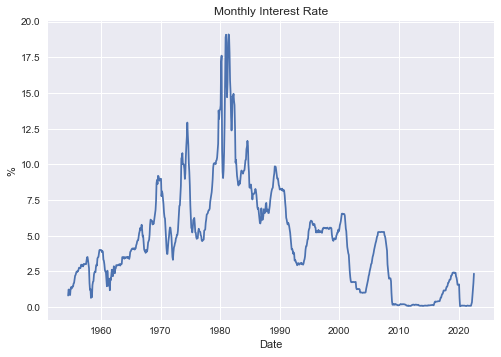

In [29]:
plt.plot(interest)
plt.title('Monthly Interest Rate')
plt.xlabel('Date')
plt.ylabel('%')
plt.show()

## Quandl 

Quandl is a source for financial, economic, and alternative datasets, which is used worldwide. The procedure that we need to follow to access the data is not very different from that of FRED. Thus, we need to first this [website](https://www.quandl.com/tools/api) and the bottom of the page you see `Sign Up` button. Once you click on it and follow the required steps, you have your Quandl API.

After having the API, we need to install the Python library for Quandl, which is `quandl`. Then, once we import `quandl`, we are ready to play with the data of our choice.

    !pip3 install quandl

In [34]:
import quandl

We are ready to move on and we would like to retrieve `WTI Crude Oil Price`from US Department of Energy. Once we run the following code, we can observe what we get by `.head()`

In [40]:
oil = quandl.get("FRED/WTISPLC", authtoken='vEjGTysiCFBuN-z5bjGP',
          start_date='2019-01-01', end_data='2022-01-01')

In [41]:
oil.head()

,Value
Date,
2019-01-01,51.38
2019-02-01,54.95
2019-03-01,58.15
2019-04-01,63.86
2019-05-01,60.83


Here, we again choose close oil price and plot it.

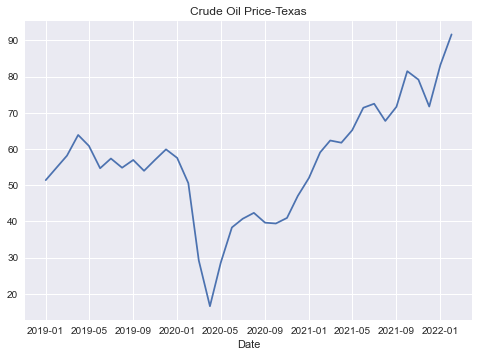

In [42]:
plt.plot(oil)
plt.title('Crude Oil Price-Texas')
plt.xlabel('Date')
plt.show()

## World Bank Data

Eventually, I would like to introduce another database called `World Bank Database`, which is quite comprehensive and include many development indicators. It is free and open access to global development data and it is rather user-friendly. Let's get started to learn how to extract data from World Bank Database.

As usual, first we install the required Python package via `pip` and then import library `wbdata`

    !pip3 install world_bank_data

In [43]:
import world_bank_data as wb

After import the world bank library, we access the list of databases by:

In [44]:
wb.get_sources()

,lastupdated,name,code,description,url,dataavailability,metadataavailability,concepts
id,,,,,,,,
1,2021-08-18,Doing Business,DBS,,,Y,Y,3
2,2022-07-20,World Development Indicators,WDI,,,Y,Y,3
3,2021-09-27,Worldwide Governance Indicators,WGI,,,Y,Y,3
5,2016-03-21,Subnational Malnutrition Database,SNM,,,Y,Y,3
6,2022-01-14,International Debt Statistics,IDS,,,Y,Y,4
...,...,...,...,...,...,...,...,...
84,2022-07-19,Education Policy,EDP,,,Y,Y,3
85,2022-07-06,PEFA_2021_SNG,SNG,,,Y,N,4
86,2021-09-24,Global Jobs Indicators Database (JOIN),JON,,,Y,Y,3


As we saw before, World Bank data is compherensive and include different databases as you see above. Before moving forward, we should define which one we want to work with. For the sake of practice, we choose number 2 (2 is the number of the data source), which is `World Development Indicators`. To make a selection, we specify the source number, which is denoted on the left of the databases. It is 2 for `World Development Indicators`. Once we denote the source number as 2, we have full list of variables that `World Development Indicators` includes:

In [46]:
wb.search_indicators('', source=2)

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
AG.AGR.TRAC.NO,"Agricultural machinery, tractors",,World Development Indicators,Agricultural machinery refers to the number of...,"Food and Agriculture Organization, electronic ...",Agriculture & Rural Development
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer produc...,,World Development Indicators,Fertilizer consumption measures the quantity o...,"Food and Agriculture Organization, electronic ...",Agriculture & Rural Development
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...,,World Development Indicators,Fertilizer consumption measures the quantity o...,"Food and Agriculture Organization, electronic ...",Agriculture & Rural Development
AG.LND.AGRI.K2,Agricultural land (sq. km),,World Development Indicators,Agricultural land refers to the share of land ...,"Food and Agriculture Organization, electronic ...","Agriculture & Rural Development ,Climate Change"
AG.LND.AGRI.ZS,Agricultural land (% of land area),,World Development Indicators,Agricultural land refers to the share of land ...,"Food and Agriculture Organization, electronic ...","Agriculture & Rural Development ,Climate Chan..."
...,...,...,...,...,...,...
VC.IDP.NWDS,"Internally displaced persons, new displacement...",,World Development Indicators,Internally displaced persons are defined accor...,The Internal Displacement Monitoring Centre (h...,Public Sector
VC.IDP.TOCV,"Internally displaced persons, total displaced ...",,World Development Indicators,Internally displaced persons are defined accor...,The Internal Displacement Monitoring Centre (h...,Public Sector
VC.IHR.PSRC.FE.P5,"Intentional homicides, female (per 100,000 fem...",,World Development Indicators,"Intentional homicides, female are estimates of...",UN Office on Drugs and Crime's International H...,Public Sector


Suppose that we want to retrieve consumer price index data but do not know how to call it. It is easy just use the keyword such as inflation or price. In order to call the variable, we use the abbreviation, on the left hand side of the variable. Once we type `unemployment` keyword, we have the following:

In [47]:
wb.search_indicators('unemployment', source=2)

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
per_allsp.adq_pop_tot,Adequacy of social protection and labor progra...,,World Development Indicators,Adequacy of social protection and labor progra...,ASPIRE: The Atlas of Social Protection - Indic...,Social Protection & Labor
per_allsp.ben_q1_tot,Benefit incidence of social protection and lab...,,World Development Indicators,Benefit incidence of social protection and lab...,ASPIRE: The Atlas of Social Protection - Indic...,Social Protection & Labor
per_allsp.cov_pop_tot,Coverage of social protection and labor progra...,,World Development Indicators,Coverage of social protection and labor progra...,ASPIRE: The Atlas of Social Protection - Indic...,Social Protection & Labor
per_lm_alllm.adq_pop_tot,Adequacy of unemployment benefits and ALMP (% ...,,World Development Indicators,Adequacy of unemployment benefits and active l...,ASPIRE: The Atlas of Social Protection - Indic...,Social Protection & Labor
per_lm_alllm.ben_q1_tot,Benefit incidence of unemployment benefits and...,,World Development Indicators,Benefit incidence of unemployment benefits and...,ASPIRE: The Atlas of Social Protection - Indic...,Social Protection & Labor
per_lm_alllm.cov_pop_tot,Coverage of unemployment benefits and ALMP (% ...,,World Development Indicators,Coverage of unemployment benefits and active l...,ASPIRE: The Atlas of Social Protection - Indic...,Social Protection & Labor
per_lm_alllm.cov_q1_tot,Coverage of unemployment benefits and ALMP in ...,,World Development Indicators,Coverage of unemployment benefits and active l...,ASPIRE: The Atlas of Social Protection - Indic...,Social Protection & Labor
per_lm_alllm.cov_q2_tot,Coverage of unemployment benefits and ALMP in ...,,World Development Indicators,Coverage of unemployment benefits and active l...,ASPIRE: The Atlas of Social Protection - Indic...,Social Protection & Labor
per_lm_alllm.cov_q3_tot,Coverage of unemployment benefits and ALMP in ...,,World Development Indicators,Coverage of unemployment benefits and active l...,ASPIRE: The Atlas of Social Protection - Indic...,Social Protection & Labor


`SL.UEM.TOTL.NE.ZS` is the input we feed the code while extracting the unemployment data. Now, it is time to decide which country we are going examine. Let's continue with `USA` but I again do not know how to call it. No worries, the following code is for you. Just type a keyword for `USA`:

In [48]:
wb.search_countries('united')

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
ARE,AE,United Arab Emirates,Middle East & North Africa,,High income,Not classified,Abu Dhabi,54.370500,24.4764
GBR,GB,United Kingdom,Europe & Central Asia,,High income,Not classified,London,-0.126236,51.5002
USA,US,United States,North America,,High income,Not classified,Washington D.C.,-77.032000,38.8895


So, `USA` is the abbreviation that we are about to use. Final step before extracting the data is deciding the time interval. Suppose that our analysis period covers between 01-01-2010 and 12-01-2019. 

Using `wbdata.get_series`, we form our data for USA inflation. 

In [53]:
unemp = wb.get_series('SL.UEM.TOTL.NE.ZS', country='USA', 
             date='2000:2022', id_or_value='id',
             simplify_index=True)


In [54]:
unemp.head(22)

Year
2000    3.99
2001    4.73
2002    5.78
2003    5.99
2004    5.53
2005    5.08
2006    4.62
2007    4.62
2008    5.78
2009    9.25
2010    9.63
2011    8.95
2012    8.07
2013    7.37
2014    6.17
2015    5.28
2016    4.87
2017    4.36
2018    3.90
2019    3.67
2020    8.05
2021    5.35
Name: SL.UEM.TOTL.NE.ZS, dtype: float64

In [58]:
unemp.describe()

count    22.000000
mean      5.956364
std       1.801659
min       3.670000
25%       4.647500
50%       5.440000
75%       7.070000
max       9.630000
Name: SL.UEM.TOTL.NE.ZS, dtype: float64

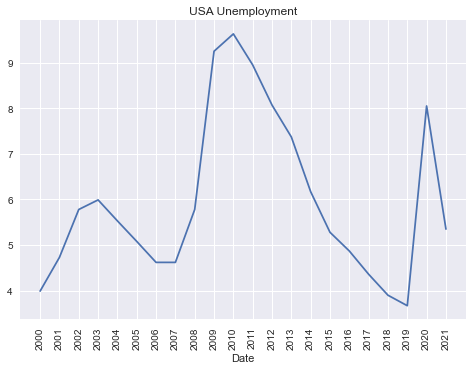

In [57]:
plt.plot(unemp)
plt.title('USA Unemployment')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

In [60]:
unemp = wb.get_series('SL.UEM.TOTL.NE.ZS', country=['USA', 'GB'],
             date='2000:2022', id_or_value='id',
             simplify_index=True)

In [66]:
unemp['GBR'].mean()

5.637000000476838

In [67]:
unemp['USA'].mean()

5.956363645466891

Let's now try with multiple countries, for instance India, Turkey, Chine, with a different data, say per capita Gross Domestic Product. First, we search for the variable and the name of the countries:

In [73]:
wb.search_indicators('gdp', source=2)

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
BG.GSR.NFSV.GD.ZS,Trade in services (% of GDP),,World Development Indicators,Trade in services is the sum of service export...,"International Monetary Fund, Balance of Paymen...","Economy & Growth,Private Sector,Trade"
BM.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net outflows (% of ...",,World Development Indicators,Foreign direct investment refers to direct inv...,"International Monetary Fund, Balance of Paymen...","Economy & Growth,Financial Sector"
BN.CAB.XOKA.GD.ZS,Current account balance (% of GDP),,World Development Indicators,Current account balance is the sum of net expo...,"International Monetary Fund, Balance of Paymen...",Economy & Growth
BX.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net inflows (% of GDP)",,World Development Indicators,Foreign direct investment are the net inflows ...,"International Monetary Fund, International Fin...","Economy & Growth,Financial Sector ,Climate Change"
BX.TRF.PWKR.DT.GD.ZS,"Personal remittances, received (% of GDP)",,World Development Indicators,Personal remittances comprise personal transfe...,World Bank staff estimates based on IMF balanc...,"Economy & Growth,Financial Sector"
...,...,...,...,...,...,...
SH.STA.MMRT,"Maternal mortality ratio (modeled estimate, pe...",,World Development Indicators,Maternal mortality ratio is the number of wome...,"WHO, UNICEF, UNFPA, World Bank Group, and the ...","Health ,Gender,Aid Effectiveness"
SH.XPD.CHEX.GD.ZS,Current health expenditure (% of GDP),,World Development Indicators,Level of current health expenditure expressed ...,World Health Organization Global Health Expend...,Health
SH.XPD.GHED.GD.ZS,Domestic general government health expenditure...,,World Development Indicators,Public expenditure on health from domestic sou...,World Health Organization Global Health Expend...,Health


`NY.GDP.PCAP.CD` is the short name of the `GDP per capita (current US$)`

In [79]:
wb.search_countries('china')

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
CHN,CN,China,East Asia & Pacific,East Asia & Pacific (excluding high income),Upper middle income,IBRD,Beijing,116.286,40.0495
HKG,HK,"Hong Kong SAR, China",East Asia & Pacific,,High income,Not classified,,114.109,22.3964
MAC,MO,"Macao SAR, China",East Asia & Pacific,,High income,Not classified,,113.550,22.1667
TWN,TW,"Taiwan, China",East Asia & Pacific,,High income,Not classified,,NaN,NaN


In [81]:
gdp = wb.get_series('NY.GDP.PCAP.CD', country=['TUR', 'IND', 'CHN'],
             date='2000:2020', id_or_value='id', simplify_index=True)

In [83]:
gdp.tail()

Country  Year
TUR      2016    10894.603378
         2017    10589.667725
         2018     9454.348443
         2019     9121.515167
         2020     8536.433320
Name: NY.GDP.PCAP.CD, dtype: float64